In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
unitfactor = -((213914163877964163*np.pi)/2760862562500000)*10**(-6)*(1/(4.48*10**(-8)))
socvec = np.array([0.05,0.05,0.17]) #  Note that in tetragonal systems the strength of the SOC is the same in the x and y directions (λ), while it is different for the z component!!


SOCRUNS = []
for i in np.linspace(0.1,1.5,10):
    SOCRUNS.append(i*socvec)

socstrengthfactors1 = np.linspace(0.1,1.5,10)
socstrengthfactors1_old = np.linspace(0,1.5,10)

SOCRUNS2 = []
for i in np.linspace(0,1.5,15):
    SOCRUNS2.append(i*socvec)

In [4]:
df = pd.read_csv("Lowestorder_newcode_N50000.csv")
# Extract summed results only
# Extract summed results only (where is_sum == 1)
summed_results = df[df["is_sum"] == 1][["soc_value", "sum_mean", "sum_sdev"]]

# Sort by `soc_value` (just in case the order is not guaranteed)
summed_results = summed_results.sort_values("soc_value")

print(summed_results)
 

                             soc_value  sum_mean  sum_sdev
8                  [0.005 0.005 0.017]  0.000485  0.000004
17  [0.01277778 0.01277778 0.04344444]  0.000807  0.000008
26  [0.02055556 0.02055556 0.06988889]  0.000978  0.000011
35  [0.02833333 0.02833333 0.09633333]  0.001044  0.000014
44  [0.03611111 0.03611111 0.12277778]  0.001057  0.000017
53  [0.04388889 0.04388889 0.14922222]  0.001019  0.000019
62  [0.05166667 0.05166667 0.17566667]  0.001033  0.000021
71  [0.05944444 0.05944444 0.20211111]  0.001012  0.000024
80  [0.06722222 0.06722222 0.22855556]  0.001031  0.000026
89                 [0.075 0.075 0.255]  0.001011  0.000026


In [5]:
df_2 = pd.read_csv("Full_newcode_N50000.csv")
# Extract summed results only
# Extract summed results only (where is_sum == 1)
summed_results_full = df_2[df_2["is_sum"] == 1][["soc_value", "sum_mean", "sum_sdev"]]

# Sort by `soc_value` (just in case the order is not guaranteed)
summed_results_full = summed_results_full.sort_values("soc_value")

print(summed_results_full)
 

                              soc_value  sum_mean  sum_sdev
55                  [0.005 0.005 0.017]  0.000509  0.000055
111  [0.01277778 0.01277778 0.04344444]  0.001214  0.000108
167  [0.02055556 0.02055556 0.06988889]  0.001598  0.000145
223  [0.02833333 0.02833333 0.09633333]  0.002055  0.000211
279  [0.03611111 0.03611111 0.12277778]  0.002598  0.000332
335  [0.04388889 0.04388889 0.14922222]  0.002566  0.000223
391  [0.05166667 0.05166667 0.17566667]  0.003417  0.000239
447  [0.05944444 0.05944444 0.20211111]  0.003094  0.000323
503  [0.06722222 0.06722222 0.22855556]  0.003190  0.000428
559                 [0.075 0.075 0.255]  0.003879  0.000344


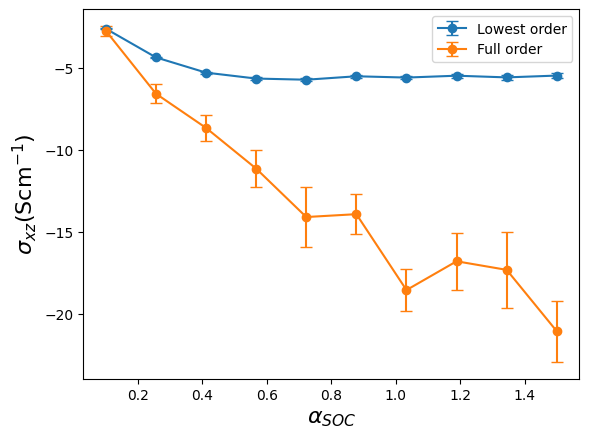

In [42]:
summed_results['soc_value']

#Lowest order result
plt.errorbar(socstrengthfactors1 , unitfactor*summed_results["sum_mean"], yerr=abs(unitfactor)*summed_results["sum_sdev"], fmt='o-', capsize=4, label="Lowest order")
#full order result
plt.errorbar(socstrengthfactors1 , unitfactor*summed_results_full["sum_mean"], yerr=abs(unitfactor)*summed_results_full["sum_sdev"], fmt='o-', capsize=4, label="Full order")


plt.xlabel(r'$\alpha_{SOC}$', fontsize=16)
plt.ylabel(r'$\sigma_{xz}$(Scm$^{-1}$)', fontsize=16)
# plt.xlim(0,0.5)
# plt.ylim(-10,0)
plt.legend()

indices of lowest order terms in the full list [6, 9, 24, 29, 30, 39, 53, 54]

In [12]:
df_2_filtered = df_2[df_2['is_sum']==0]
df_2_extracted = df_2_filtered[['idx', 'component_index', 'mean', 'sdev']]

# Group by 'idx' and sort within each group
sorted_groups = df_2_extracted.groupby('idx').apply(lambda x: x.assign(abs_mean=x['mean'].abs()).sort_values('abs_mean', ascending=False).drop(columns='abs_mean')) #creates temporary column abs_mean. sorts by the values of this column. Then drops the column.

# Reset the index to get a clean DataFrame
sorted_groups = sorted_groups.reset_index(drop=True)

# Display the result
# print(sorted_groups)

In [22]:
# sorted_groups[sorted_groups['idx']==0]

In [27]:
sorted_groups['component_index'] = sorted_groups['component_index'].astype(int)

lowest_index=[6, 9, 24, 29, 30, 39, 53, 54]
# print("Data types in DataFrame:", sorted_groups.dtypes)
# print("Data type of list lowest_index:", type(lowest_index[0]))
remove_linear = sorted_groups[~sorted_groups['component_index'].isin(lowest_index)]
print("Filtered DataFrame without lowest order entries:")
print(remove_linear)

Filtered DataFrame without lowest order entries:
     idx  component_index          mean          sdev
0      0                3 -4.202370e-03  9.034937e-06
1      0                0  2.562120e-03  6.045095e-06
2      0               19  1.255586e-03  1.869516e-06
5      0               13  4.172623e-04  4.036770e-06
7      0                4 -2.804265e-04  9.808346e-07
..   ...              ...           ...           ...
545    9               31 -1.537766e-07  9.683043e-09
546    9               42 -1.430747e-07  5.108241e-09
547    9               43  4.700860e-08  2.703959e-09
548    9               34 -2.731135e-08  1.492946e-09
549    9               32 -1.015583e-08  4.277995e-10

[470 rows x 4 columns]


In [28]:
remove_linear[remove_linear['idx']==0]

,idx,component_index,mean,sdev
0,0,3,-4.202370e-03,9.034937e-06
1,0,0,2.562120e-03,6.045095e-06
2,0,19,1.255586e-03,1.869516e-06
5,0,13,4.172623e-04,4.036770e-06
7,0,4,-2.804265e-04,9.808346e-07
10,0,20,1.842475e-04,6.683572e-07
12,0,1,1.003730e-04,6.708002e-07
14,0,5,-3.004397e-05,1.955962e-06
15,0,2,1.363986e-05,1.034358e-06
17,0,15,1.128405e-05,9.345716e-07


In [29]:
remove_linear[remove_linear['idx']==1]

,idx,component_index,mean,sdev
55,1,3,-1.292308e-02,2.197145e-05
56,1,0,7.519778e-03,1.193188e-05
57,1,19,3.102007e-03,3.890645e-06
58,1,13,2.382792e-03,1.050770e-05
62,1,4,-6.935098e-04,2.451260e-06
65,1,20,4.461050e-04,1.630311e-06
67,1,1,2.410379e-04,1.674867e-06
68,1,5,-1.814247e-04,7.272511e-06
70,1,15,7.926399e-05,3.419096e-06
71,1,2,7.720944e-05,3.872407e-06


In [38]:
remove_linear[remove_linear['idx']==9]

,idx,component_index,mean,sdev
495,9,3,-1.782893e-01,2.620420e-03
496,9,13,9.984635e-02,1.332506e-02
497,9,0,6.476290e-02,1.601377e-02
498,9,19,1.390732e-02,9.677378e-05
499,9,5,-6.053802e-03,9.369124e-05
502,9,4,-3.746414e-03,1.496177e-05
503,9,15,3.192138e-03,4.315742e-05
505,9,2,2.629661e-03,4.912047e-05
508,9,20,1.719145e-03,7.158128e-06
509,9,1,1.153721e-03,9.698344e-06
